In [669]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
pd.set_option('display.max_columns', None) #Shows all of the columns in the csv file

In [671]:
#Loading the csv file
df = pd.read_csv('spotify-2023.csv', encoding='latin1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


In [673]:
#Checking the data for any null values
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [675]:
#Checking each column's data type
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [677]:
#Checking inital rows and columns before cleaning the data
df.shape

(953, 24)

In [678]:
#Upon checking the data types of each column, it is noted that columns 'streams', 'in_deezer_playlists' and 'in_shazam_charts' are of data type object
#Since in_deezer_playlists and in_shazam_charts are object data type due to commas, remove the commas using replace function
df['in_deezer_playlists']=df['in_deezer_playlists'].str.replace(',','')
df['in_shazam_charts']=df['in_shazam_charts'].str.replace(',','')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


In [681]:
#However removing the commas does not change its data type
#To change the data type use 'pd.to_numeric' for the string data type to float in the 'streams' column, and '.astype(float)' to convert the column to float data type
#Convert data type object to float
df['streams'] = pd.to_numeric(df['streams'], errors='coerce') #Converting streams column to float data type
df['in_deezer_playlists'] = df['in_deezer_playlists'].astype(float) #Converting 'in_deezer_playlists' to float data type
df['in_shazam_charts'] = df['in_shazam_charts'].astype(float) #Converting 'in_shazam_charts' to float data type
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,263,45.0,10,826.0,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,126,58.0,14,382.0,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,207,91.0,14,949.0,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,207,125.0,12,548.0,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,133,87.0,15,425.0,144,A,Minor,65,23,80,14,63,11,6


In [683]:
#Upon checking for the data type of each column again, 'streams', 'in_deezer_playlists' and 'in_shazam_charts' are now of data type float
df.dtypes

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists     float64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

In [685]:
#Checking for any new null values after converting data type to float
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [687]:
#Removing rows with duplicates in columns 'track_name' and 'artist(s)_name'
df = df.drop_duplicates(['track_name','artist(s)_name'])
df
#4 rows that have the same track_name and artist(s)_name have been removed

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,263,45.0,10,826.0,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,126,58.0,14,382.0,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,207,91.0,14,949.0,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,207,125.0,12,548.0,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,133,87.0,15,425.0,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363.0,61,13,37.0,1,0.0,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870.0,4,0,8.0,0,0.0,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683.0,2,0,7.0,0,0.0,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612.0,29,26,17.0,0,0.0,97,C#,Major,82,67,77,8,0,12,5


In [689]:
#Removing all rows with null values 
clean= df.dropna()
clean
#The dataframe now has a shape of 813 rows × 24 columns after removing all rows will null values

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,263,45.0,10,826.0,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,126,58.0,14,382.0,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,207,91.0,14,949.0,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,207,125.0,12,548.0,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,133,87.0,15,425.0,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363.0,61,13,37.0,1,0.0,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870.0,4,0,8.0,0,0.0,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683.0,2,0,7.0,0,0.0,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612.0,29,26,17.0,0,0.0,97,C#,Major,82,67,77,8,0,12,5


In [691]:
#Renaming columns for readability
clean = clean.rename(columns={'track_name':'Track_name','artist(s)_name':'Artist','artist_count':'Artist_count','released_year':'Released_year',
                   'released_month':'Released_month','released_day':'Released_day','in_spotify_playlists':'Spotify_playlists',
                   'in_spotify_charts':'Spotify_charts','streams':'Streams','in_apple_playlists':'Apple_playlists','in_apple_charts':'Apple_charts',
                   'in_deezer_playlists':'Deezer_playlists','in_deezer_charts':'Deezer_charts','in_shazam_charts':'Shazam_charts',
                   'bpm':'BPM','key':'Key','mode':'Mode','danceability_%':'Danceability%','valence_%':'Valence%','energy_%':'Energy%',
                   'acousticness_%':'Acousticness%','instrumentalness_%':'Instrumentalness%','liveness_%':'Liveness%',
                   'speechiness_%':'Speechiness%'})
clean.head()

,Track_name,Artist,Artist_count,Released_year,Released_month,Released_day,Spotify_playlists,Spotify_charts,Streams,Apple_playlists,Apple_charts,Deezer_playlists,Deezer_charts,Shazam_charts,BPM,Key,Mode,Danceability%,Valence%,Energy%,Acousticness%,Instrumentalness%,Liveness%,Speechiness%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,263,45.0,10,826.0,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,126,58.0,14,382.0,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,207,91.0,14,949.0,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,207,125.0,12,548.0,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,133,87.0,15,425.0,144,A,Minor,65,23,80,14,63,11,6


In [693]:
#Resetting index to match the shape of the dataframe
final = clean.reset_index(drop=True)
final

,Track_name,Artist,Artist_count,Released_year,Released_month,Released_day,Spotify_playlists,Spotify_charts,Streams,Apple_playlists,Apple_charts,Deezer_playlists,Deezer_charts,Shazam_charts,BPM,Key,Mode,Danceability%,Valence%,Energy%,Acousticness%,Instrumentalness%,Liveness%,Speechiness%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,263,45.0,10,826.0,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,126,58.0,14,382.0,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,207,91.0,14,949.0,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,207,125.0,12,548.0,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,133,87.0,15,425.0,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363.0,61,13,37.0,1,0.0,144,A,Major,60,24,39,57,0,8,3
809,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870.0,4,0,8.0,0,0.0,166,F#,Major,42,7,24,83,1,12,6
810,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683.0,2,0,7.0,0,0.0,92,C#,Major,80,81,67,4,0,8,6
811,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612.0,29,26,17.0,0,0.0,97,C#,Major,82,67,77,8,0,12,5


## Overview of Dataset
### How many rows and columns does the dataset contain?####  The dataset had 953 rows × 24 columns before cleaning and 813 rows x 24 columns after cleaning

### What are the data types of each column? Are there any missing values?####  Before cleaning the dataset, all columns are int64 data type except for 'track_name', 'artist(s)_name', 'streams',####   'in_deezer_playlists', 'in_shazam_charts', 'key', and 'mode' are of object data type..

## Basic Descriptive Statistics
### What are the mean, median, and standard deviation of the streams column?
### What is the distribution of released_year and artist_count? Are there any noticeable trends or outliers?

In [696]:
#Using the .describe() function can give us basic descriptive statistics of each column
final.describe()

,Artist_count,Released_year,Released_month,Released_day,Spotify_playlists,Spotify_charts,Streams,Apple_playlists,Apple_charts,Deezer_playlists,Deezer_charts,Shazam_charts,BPM,Danceability%,Valence%,Energy%,Acousticness%,Instrumentalness%,Liveness%,Speechiness%
count,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,8.130000e+02,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000
mean,1.570726,2018.505535,6.019680,13.699877,4850.558426,11.779828,4.689224e+08,59.924969,49.567036,372.646986,2.437884,57.776138,122.546125,67.376384,51.137761,64.341943,26.404674,1.660517,18.168512,10.551046
std,0.877457,10.719970,3.572901,9.288133,7756.839581,18.645236,5.239815e+08,74.684331,49.624745,1159.823364,5.368916,153.877419,28.195428,14.701665,23.652049,16.137225,25.496543,8.764734,13.559208,10.238362
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2021.000000,3.000000,5.000000,829.000000,0.000000,1.342558e+08,12.000000,6.000000,12.000000,0.000000,0.000000,99.000000,57.000000,32.000000,53.000000,5.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,5.000000,13.000000,2035.000000,3.000000,2.634533e+08,32.000000,34.000000,39.000000,0.000000,3.000000,120.000000,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,4875.000000,16.000000,6.009768e+08,78.000000,84.000000,142.000000,2.000000,39.000000,141.000000,79.000000,70.000000,76.000000,41.000000,0.000000,24.000000,12.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.562544e+09,532.000000,275.000000,12367.000000,45.000000,1451.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [698]:
#We can also calculate the mean, median, and standard deviation of the streams column using the .mean(), .median(), and .std() function respectively
print("The mean of streams is:", final['Streams'].mean()) #Printing the mean of 'Streams' column
print("The median of streams is:", final['Streams'].median()) #Printing the median of 'Streams' column
print("The standard deviation of streams is:", final['Streams'].std()) #Printing the standard deviation of 'Streams' column

The mean of streams is: 468922407.2521525
The median of streams is: 263453310.0
The standard deviation of streams is: 523981505.32150424


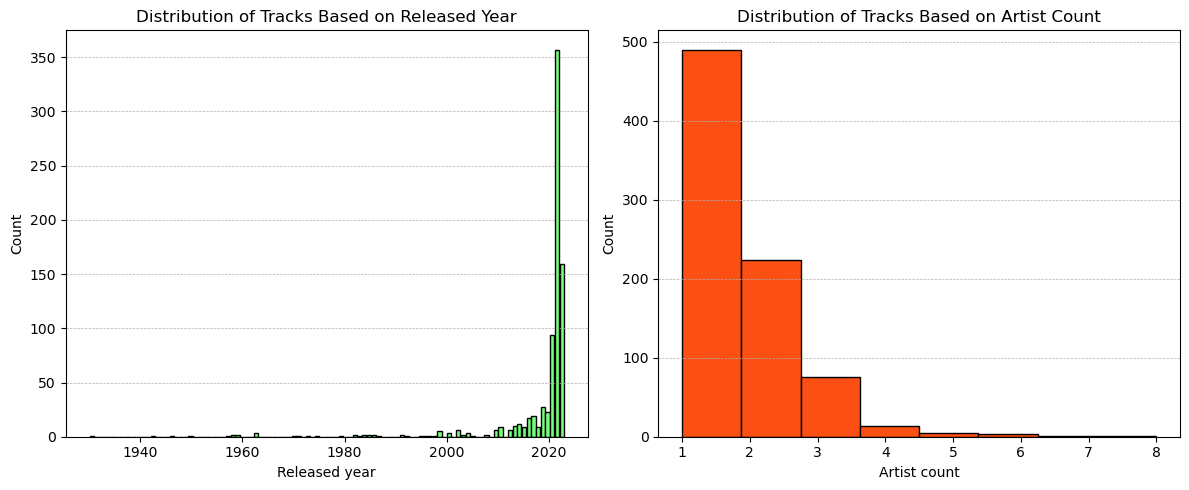

In [700]:
#Setting the figure size of the plots
plt.figure(figsize=(12,5))

#Creating a subplot for distribution of tracks based on released year
plt.subplot(1,2,1) #First subplot
plt.hist(final['Released_year'], bins = 101, rwidth = 0.9, edgecolor = 'black', color = '#76ff7a') #Creating a histogram for tracks released per year
plt.title("Distribution of Tracks Based on Released Year") #Setting a title for the graph
plt.xlabel("Released year") #Setting x-label
plt.ylabel("Count") #Setting y-label
plt.grid(axis = 'y',linestyle = '--', linewidth = 0.5) #Adding a grid to the graph

#Creating a subplot for distribution of tracks based on artist count
plt.subplot(1,2,2) #Second subplot
plt.hist(final['Artist_count'], bins = 8,edgecolor = 'black', linewidth = 1, color = '#fb4f14') #Creating a histogram for count of songs based on the artist count of the song
plt.title("Distribution of Tracks Based on Artist Count") #Setting a title for the graph
plt.xlabel("Artist count") #Setting x-label
plt.ylabel("Count") #Setting y-label
plt.grid(axis = 'y',linestyle = '--', linewidth = 0.5) #Adding a grid to the graph 
plt.tight_layout()

In [702]:
#Creating a function for calculation of outliers
def findoutlier(final):
    q1=final.quantile(0.25)
    q3=final.quantile(0.75)
    iqr=q3-q1
    outliers = final[((final<(q1-1.5*iqr)) | (final>(q3+1.5*iqr)))].shape[0]
    return outliers

yearoutliers = findoutlier(final['Released_year']) #Calculating the outliers for 'Released_year'
artistoutliers = findoutlier(final['Artist_count']) #Calculating the outliers for 'Artist_count'

print("The number of outliers in 'Released year' column is:",yearoutliers) #Printing outliers for 'Released_year'
print("The number of outliers in 'Artist_count' column is:",artistoutliers) #Printing outliers for 'Artist_count'

The number of outliers in 'Released year' column is: 180
The number of outliers in 'Artist_count' column is: 24


## Top Performers
### Which track has the highest number of streams? Display the top 5 most streamed tracks.
### Who are the top 5 most frequent artists based on the number of tracks in the dataset?

In [705]:
#Sorting the cleaned data by number of streams from highest to lowest
#Using .head() to display only the first 5 rows
top5streams = final.sort_values(by = 'Streams', ascending = False).head().reset_index(drop=True)
top5streams

,Track_name,Artist,Artist_count,Released_year,Released_month,Released_day,Spotify_playlists,Spotify_charts,Streams,Apple_playlists,Apple_charts,Deezer_playlists,Deezer_charts,Shazam_charts,BPM,Key,Mode,Danceability%,Valence%,Energy%,Acousticness%,Instrumentalness%,Liveness%,Speechiness%
0,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,0,6808.0,7,0.0,96,C#,Minor,83,93,65,58,0,9,8
1,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,117,843.0,4,69.0,90,D,Major,76,91,50,54,0,7,5
2,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2.713922e+09,433,107,3631.0,0,26.0,104,C#,Major,77,36,63,1,0,36,5
3,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2.665344e+09,492,99,798.0,31,0.0,170,C#,Major,59,48,76,4,0,10,5
4,Believer,Imagine Dragons,1,2017,1,31,18986,23,2.594040e+09,250,121,2969.0,10,31.0,125,A#,Minor,77,74,78,4,0,23,11


In [707]:
#Using .value_counts() function to count how many times each artist shows up in the 'Artist' column
#Using .head() function to display only the first 5 rows
#Using .reset_index() function to convert teh data into a dataframe
top5frequent = final['Artist'].value_counts().head().reset_index()
top5frequent

,Artist,count
0,Taylor Swift,29
1,SZA,17
2,Bad Bunny,16
3,The Weeknd,14
4,Harry Styles,12


## Temporal Trends
### Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.
### Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?

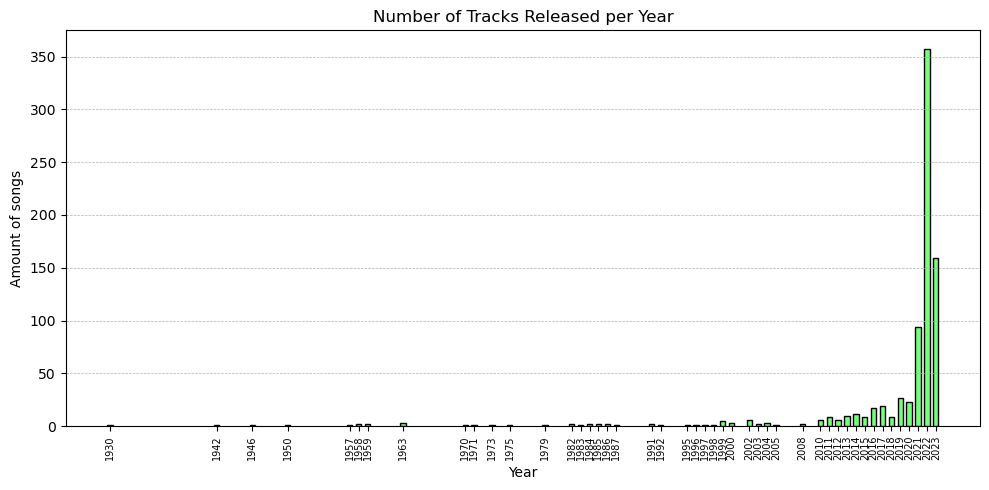

In [710]:
#Getting how many tracks were released each year
trackperyear = final['Released_year'].value_counts()

#Setting values for x and y axis
tpyi = trackperyear.index #Index of trackperyear will be used for the x-axis
tpyv = trackperyear.values #Values of trackperyear will be the value of each year on the y-axis

#Setting graph details
plt.figure(figsize = (10,5))
plt.bar(tpyi, tpyv, width = 0.6, edgecolor='black',linewidth=1, color = '#76ff7a') #Using bar graph to show comparison of songs over time
plt.xticks(tpyi, rotation = 90, fontsize = 7) #Setting the label of each bar in the graph on the x-axis
plt.title("Number of Tracks Released per Year") #Setting a title for the graph
plt.xlabel("Year") #Setting x-label
plt.ylabel("Amount of songs") #Setting y-label
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5) #Adding a grid to the graph
plt.tight_layout()
plt.show()

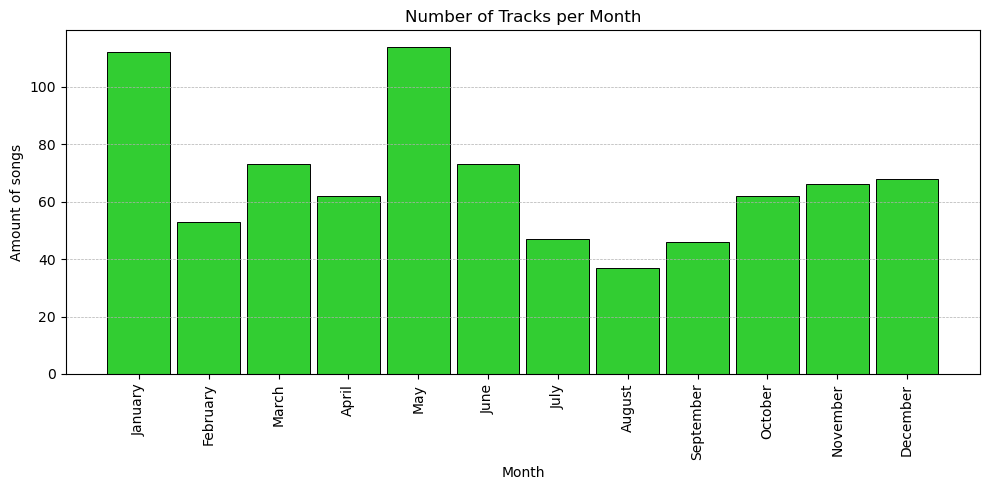

In [712]:
#Getting how many tracks were released each month and sorting its index from 1-12 (January to December)
trackpermonth = final['Released_month'].value_counts().sort_index()

#Creating list for the x-axis of the graph
months = ['January','February','March','April','May','June','July','August','September','October','November','December']

#Setting values for x and y axis
tpmi = trackpermonth.index #Index of trackpermonth will be used for the x-axis
tpmv = trackpermonth.values #Values of trackpermonth will be used for the y-axis

#Setting graph details
plt.figure(figsize = (10,5))
plt.bar(tpmi, tpmv, width = 0.9, edgecolor='black',linewidth=0.7, color = '#32cd32') #Using bar graph to show comparison of songs over time
plt.xticks(tpmi, months, rotation = 90, fontsize = 10) #Changing then x-ticks to month names
plt.title("Number of Tracks per Month") #Setting a title for the graph
plt.xlabel("Month") #Setting an x-label
plt.ylabel("Amount of songs") #Setting a y-lael
plt.grid(axis = 'y',linestyle = '--', linewidth = 0.5) #Adding a grid to the grpah
plt.tight_layout()
plt.show()

## Genre and Music Characteristics

### Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?
### Is there a correlation between danceability_% and energy_%? How about valence_% and acousticness_%?

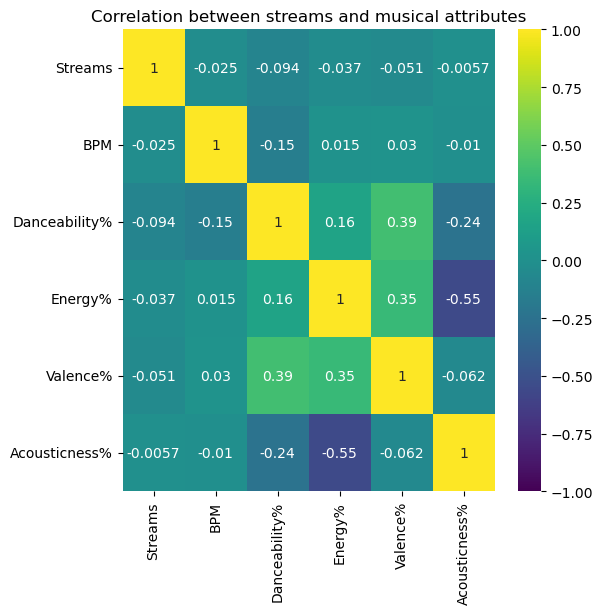

In [715]:
#Creating a matrix for correlation to be used for the heatmap
cor = final[['Streams','BPM','Danceability%','Energy%','Valence%','Acousticness%']]
hm = cor.corr()

#Setting graph details
plt.figure(figsize = (6,6))
sns.heatmap(hm, cmap = 'viridis', vmax = 1, vmin = -1, annot = True) #Using heatmap to show correlation between streams and musical attributes
plt.title("Correlation between streams and musical attributes") #Setting a title for the graph 
plt.show()

## Platform Popularity

### How do the numbers of tracks in spotify_playlists, spotify_charts, and apple_playlists compare? 
### Which platform seems to favor the most popular tracks?

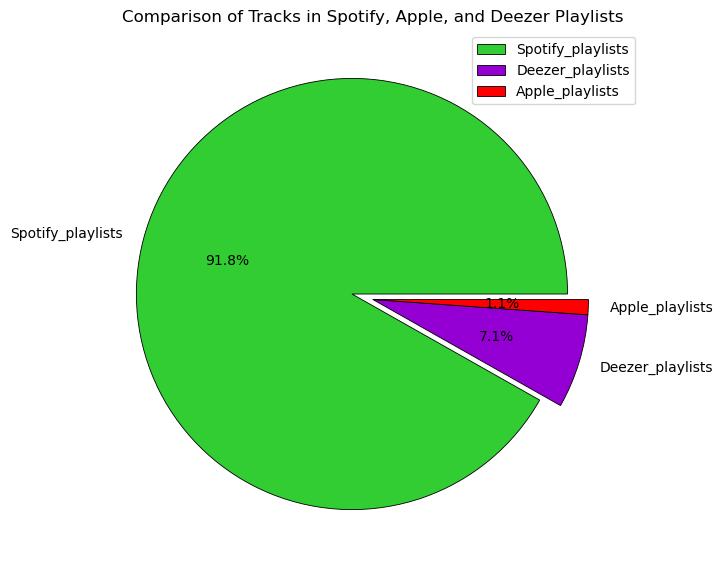

In [720]:
#Getting the amount of tracks in spotify_playlists, Deezer_playlists, and apple_playlists
playliststotal = [final['Spotify_playlists'].sum(),final['Deezer_playlists'].sum(),final['Apple_playlists'].sum()]

label = ['Spotify_playlists','Deezer_playlists','Apple_playlists'] #Creating a list for the label of the pie chart

color = ['#32cd32', '#9400d3', '#ff0000'] #Creating a list for the colors of the pie chart

#Setting graph details
plt.figure(figsize=(7,7))
plt.pie(playliststotal, labels = label, autopct = '%0.1f%%', colors = color, explode = [0.1, 0, 0], wedgeprops = {'edgecolor':'black', 'linewidth' : 0.6}) #Creating a pie chart for comparison between the different platforms
plt.title("Comparison of Tracks in Spotify, Apple, and Deezer Playlists") #Setting a title for the graph
plt.legend() #Adding a legend
plt.show()

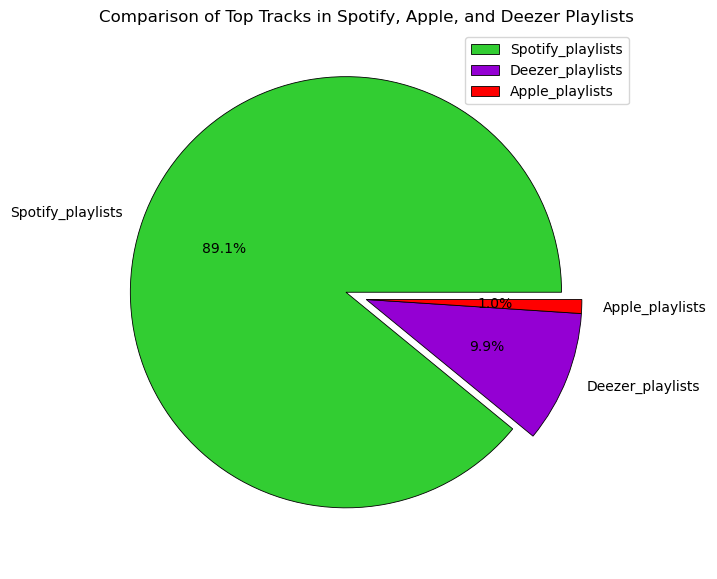

In [722]:
#Getting the amount of tracks in spotify_playlists, Deezer_playlists, and apple_playlists only from the top 5 songs based on streams
topplayliststotal = [top5streams['Spotify_playlists'].sum(),top5streams['Deezer_playlists'].sum(),top5streams['Apple_playlists'].sum()]

color = ['#32cd32', '#9400d3', '#ff0000'] #Creating a list for the colors of the pie chart

#Setting graph details
plt.figure(figsize=(7,7))
plt.pie(topplayliststotal,labels=label,autopct='%0.1f%%', colors = color, explode = [0.1, 0, 0], wedgeprops = {'edgecolor':'black', 'linewidth' : 0.6}) #Creating a pie chart for comparison between the different platforms
plt.title("Comparison of Top Tracks in Spotify, Apple, and Deezer Playlists") #Setting a title for the graph
plt.legend()
plt.show()

## Advanced Analysis

### Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?
### Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.

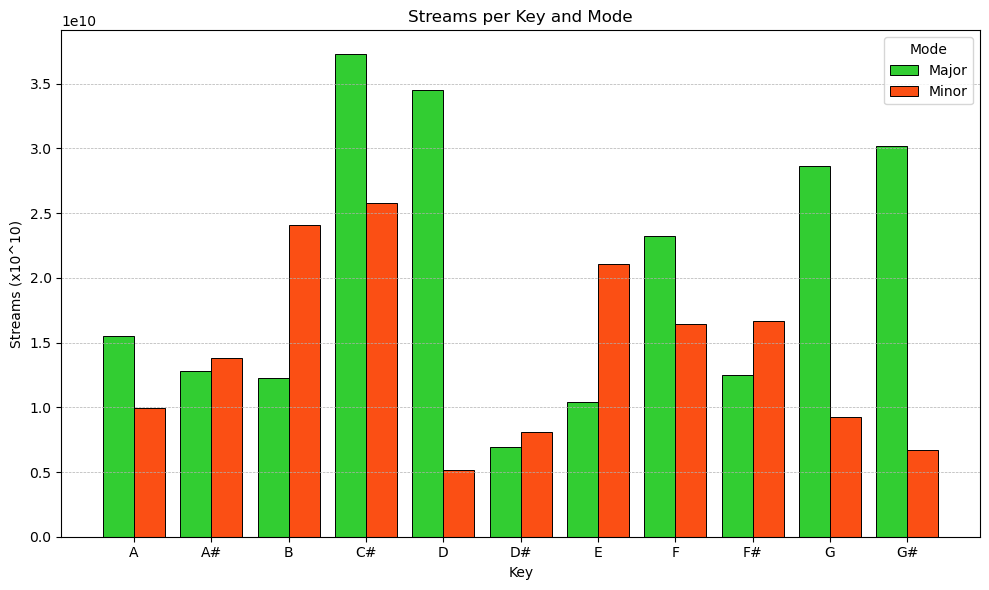

In [725]:
#Grouping data by minor mode and major mode and getting the sum of streams for each key
minor = final[final['Mode'] == 'Minor'].groupby(['Key'])['Streams'].sum()
major = final[final['Mode'] == 'Major'].groupby(['Key'])['Streams'].sum()

#Setting the data for the plot
x = np.arange(11) #This is needed for the x-axis labels of the graph
keys = minor.index.tolist() #The index made by the .groupby() function will replace the previously set x variable
minorbar = minor.values #Getting the values of the total streams of each key in minor mode for each bar on the graph
majorbar = major.values #Getting the values of the total streams of each key in major mode for each bar on the graph

#Setting plot details
plt.figure(figsize = (10, 6))

#Creating a grouped bar graph for better comparison of the number of streams by key and mode
plt.bar(x - 0.2, majorbar, width = 0.4, label = "Major", edgecolor = 'black',linewidth = 0.7, color = '#32cd32')
plt.bar(x + 0.2, minorbar, width = 0.4, label = "Minor", edgecolor = 'black', linewidth = 0.7, color = '#fb4f14') 
 
plt.title("Streams per Key and Mode") #Setting a title for the graph
plt.xticks(x, keys) #Changing np.arange(11) to the index of minor
plt.xlabel("Key") #Setting an x-label
plt.ylabel("Streams (x10^10)") #Setting a y-label
plt.legend(title = "Mode") #Adding a legend
plt.grid(axis = 'y',linestyle = '--', linewidth = 0.5) #Adding a grid to the graph
plt.tight_layout()
plt.show()

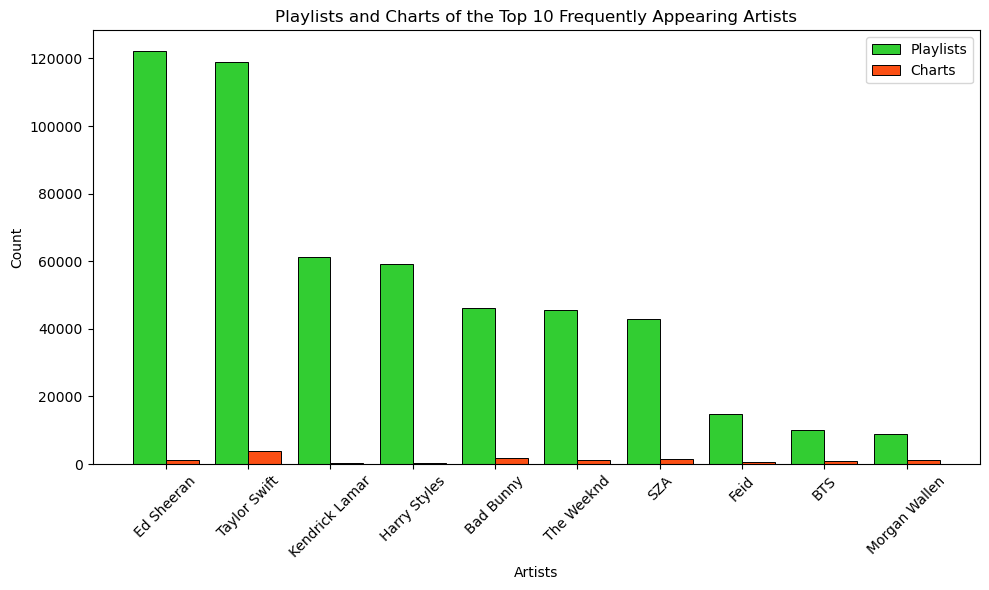

In [727]:
#Getting the index of the top 10 most frequent appearing artists and turning it into a list
topartists = final['Artist'].value_counts().head(10).index.tolist()

#Creating a dataframe only containing rows which have the name of the most frequent appearing artists based on the list 'topartists'
topdf = final[final['Artist'].isin(topartists)]

#Setting the data for the plot
topplaylists = topdf.groupby('Artist')[['Spotify_playlists', 'Deezer_playlists', 'Apple_playlists']].sum() #Creating a dataframe that sums each artist's 'Spotify_playlists', 'Deezer_playlists', and 'Apple_playlists'
topplaylists['Total playlists'] = topplaylists.sum(axis = 1) #Creating another column for the total playlists of the artist by summing the whole row
topplaylists = topplaylists.sort_values(by = 'Total playlists', ascending = False) #Sorting the dataframe by its 'Total playlists' column from highest to lowest

topcharts = topdf.groupby('Artist')[['Spotify_charts', 'Deezer_charts', 'Apple_charts', 'Shazam_charts']].sum() #Creating a dataframe that sums each artist's 'Spotify_charts', 'Deezer_charts', 'Apple_charts', 'Shazam_charts'
topcharts['Total charts'] = topcharts.sum(axis = 1) #Creating another column for the total charts of the artist by summing the whole row
topcharts = topcharts.reindex(topplaylists.index) #Sorting the dataframe to have same arranegemnt of index as topplaylists

#Setting the data for the plot
xnames = np.arange(10) #This is needed for the x axis labels of the graph
names = topplaylists.index.tolist() #The index made by the .groupby() function will replace the previously set x variable
playlistsbar = topplaylists['Total playlists'].values #Getting the values of the 'Total playlists' column from topplaylists for each bar on the graph
chartsbar = topcharts['Total charts'].values #Getting the values of the 'Total charts' column from topcharts for each bar on the graph

#Setting plot details
plt.figure(figsize = (10, 6))

#Creating a grouped bar graph for better comparison of playlists and charts of the top 10 frequent sppearing artists
plt.bar(xnames - 0.2, playlistsbar, width = 0.4, label = "Playlists", edgecolor = 'black',linewidth = 0.7, color = '#32cd32') 
plt.bar(xnames + 0.2, chartsbar, width = 0.4, label = "Charts", edgecolor = 'black', linewidth = 0.7, color = '#fb4f14') 

plt.title("Playlists and Charts of the Top 10 Frequently Appearing Artists") #Setting a title for the graph
plt.xticks(xnames, names, rotation = 45) #Changing np.arange(10) to the index of topplaylists
plt.xlabel("Artists") #Adding an x-label
plt.ylabel("Count") #Adding a y-label
plt.legend() #Adding a legend
plt.tight_layout()
plt.show() 

## References

### https://www.youtube.com/watch?v=xi0vhXFPegw

### https://sparkbyexamples.com/pandas/use-pandas-to-numeric-function/#:~:text=Key%20Points%20%E2%80%93-,Pandas.,errors%2C%20coercion%2C%20and%20downcasting.
### 
https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe
### https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/#:~:text=Finding%20outliers%20using%20statistical%20methods,-Since%20the%20data&text=Using%20the%20IQR%2C%20the%20outlier,Q1%20(Q3%E2%80%93Q1).

### https://sparkbyexamples.com/pandas/use-pandas-to-numeric-function/#:~:text=Key%20Points%20%E2%80%93-,Pandas.,errors%2C%20coercion%2C%20and%20downcasting.

### https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/

### https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame

### https://www.w3schools.com/python/pandas/ref_df_drop_duplicates.asp#:~:text=The%20drop_duplicates()%20method%20removes,considered%20when%20looking%20for%20duplicates.

### https://stackoverflow.com/questions/56947333/how-to-remove-commas-from-all-the-column-in-pandas-at-once

### https://www.freecodecamp.org/news/python-lambda-function-explained/

### https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/#:~:text=Finding%20outliers%20using%20statistical%20methods,-Since%20the%20data&text=Using%20the%20IQR%2C%20the%20outlier,Q1%20(Q3%E2%80%93Q1).

### https://mode.com/python-tutorial/counting-and-plotting-in-python

### https://www.datacamp.com/tutorial/seaborn-heatmaps?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720824&utm_adgroupid=157156376311&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=684592140434&utm_targetid=dsa-2218886984100&utm_loc_interest_ms=&utm_loc_physical_ms=9060961&utm_content=&utm_campaign=230119_1-sea~dsa~tofu_2-b2c_3-row-p2_4-prc_5-na_6-na_7-le_8-pdsh-go_9-nb-e_10-na_11-na-oct24&gad_source=1&gclid=Cj0KCQjwm5e5BhCWARIsANwm06hpydYDHP2QpYkRfdNBYJR-0BWhWo4WwUmeDdvOwoDdkaMqGI4iRpcaAkmMEALw_wcB

### https://sparkbyexamples.com/pandas/pandas-convert-float-to-integer-type/#:~:text=Use%20astype()%20to%20convert,them%20and%20applying%20astype()%20.

### https://www.geeksforgeeks.org/create-a-grouped-bar-plot-in-matplotlib/

### https://sparkbyexamples.com/pandas/convert-pandas-index-to-list/#:~:text=To%20convert%20an%20index%20to,()%20and%20list()%20functions.

### https://www.analyticsvidhya.com/blog/2020/03/groupby-pandas-aggregating-data-python/

### https://saturncloud.io/blog/how-to-select-rows-from-a-dataframe-based-on-list-values-in-a-column-in-pandas/#:~:text=To%20select%20rows%20from%20a%20DataFrame%20based%20on%20a%20list,to%20select%20the%20desired%20rows.

### https://stackoverflow.com/questions/12555323/how-to-add-a-new-column-to-an-existing-dataframe

### https://www.w3schools.com/python/pandas/ref_df_reindex.asp#:~:text=The%20reindex()%20method%20allows,indexes%2C%20and%20the%20columns%20labels.&text=Note%3A%20The%20values%20are%20set,the%20same%20as%20the%20old.
/
